* Veri 5 farklı türe ait 5 farklı klasörden oluşuyor. Bu klasörde ki resimler çekilerek ML de olduğu gibi X  ve y formatına çevrilip train test split işlemi sonrasında model kuruldu

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ana dosyanın yolu

my_data_dir='/content/drive/MyDrive/TechProEdu_DL/Proje_çiçek_sınıflandırma/flower_photos'

In [4]:
# Ana dosyanın içeriği

os.listdir(my_data_dir)

['LICENSE.txt', 'daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [5]:
types = my_data_dir+'/tulips'

In [6]:
# Çiçek türlerinin resim sayısına bakalım.

len(os.listdir(types))

799

Çiçek türlerine ait resim sayısı:
* daisy = 633
* dandelion = 898
* roses = 641
* sunflowers = 699
* tulips = 799

In [7]:
os.listdir(my_data_dir+'/tulips')[0]

'4042180234_64cd2859c9_m.jpg'

In [8]:
# örnek resim çıktıları için yolları belirleyelim

daisy_path = my_data_dir+'/daisy'+'/100080576_f52e8ee070_n.jpg'
dandelion_path = my_data_dir+'/dandelion'+'/10043234166_e6dd915111_n.jpg'
roses_path = my_data_dir+'/roses'+'/10090824183_d02c613f10_m.jpg'
sunflowers_path = my_data_dir+'/sunflowers'+'/1008566138_6927679c8a.jpg'
tulips_path = my_data_dir+'/tulips'+'/100930342_92e8746431_n.jpg'

In [9]:
daisy_img=imread(daisy_path)
dandelion_img=imread(dandelion_path)
roses_img=imread(roses_path)
sunflowers_img=imread(sunflowers_path)
tulips_img=imread(tulips_path)

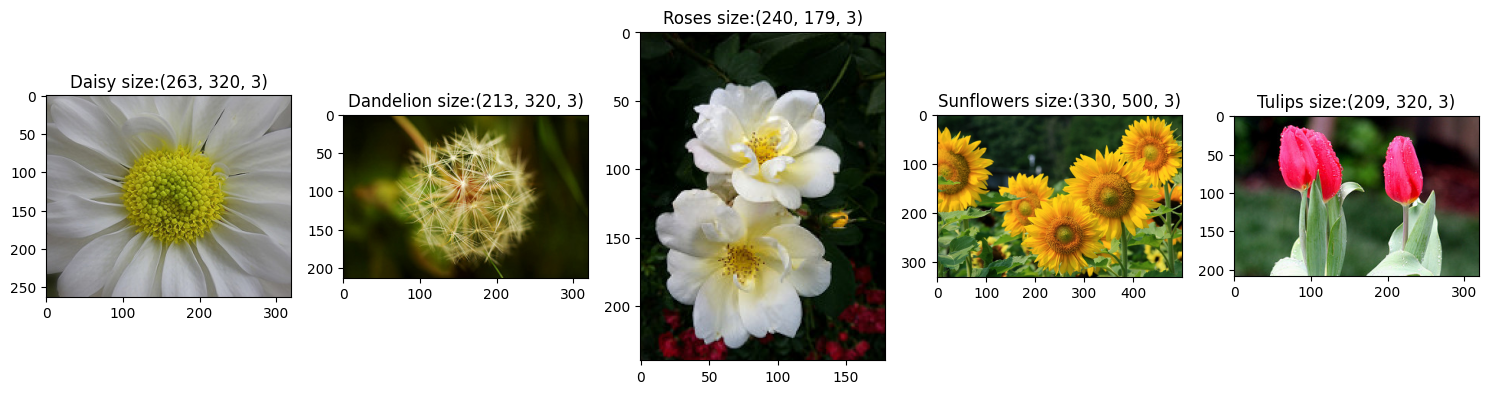

In [ ]:
# Dosya path'leri üzerinden her türün ilk resmini çekiyoruz

plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.imshow(daisy_img)
plt.title(f"Daisy size:{daisy_img.shape}")

plt.subplot(1, 5, 2)
plt.imshow(dandelion_img)
plt.title(f"Dandelion size:{dandelion_img.shape}")

plt.subplot(1, 5, 3)
plt.imshow(roses_img)
plt.title(f"Roses size:{roses_img.shape}")

plt.subplot(1, 5, 4)
plt.imshow(sunflowers_img)
plt.title(f"Sunflowers size:{sunflowers_img.shape}")

plt.subplot(1, 5, 5)
plt.imshow(tulips_img)
plt.title(f"Tulips size:{tulips_img.shape}")

plt.tight_layout()
plt.show()

* Yukarıda ki çıktılardan da anlaşılacağı üzere resimlerimiz farklı boyutlarda. Model öncesi ortak bir shape belirlemeliyiz.

#### Her Bir Türün Shape Dağılımı

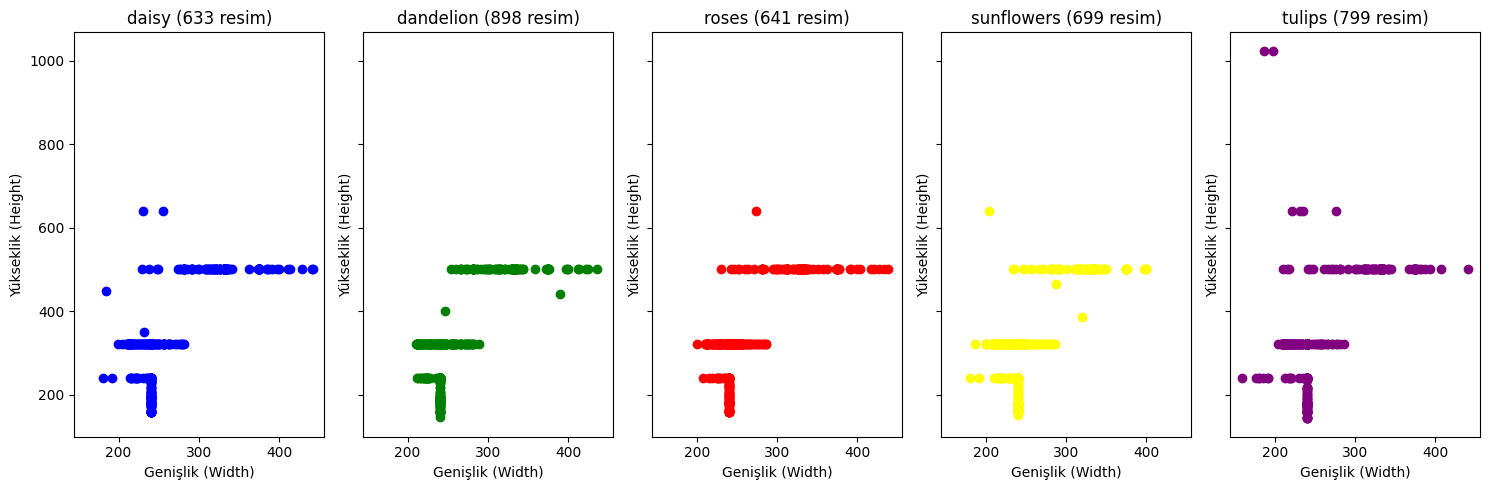

In [ ]:
# Renk listesi
colors = {
    'daisy': 'blue',
    'dandelion': 'green',
    'roses': 'red',
    'sunflowers': 'yellow',
    'tulips': 'purple'
}

# Beş ayrı scatter plot oluşturmak için figürü ve alt-çerçeveleri hazırlayın
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharex=True, sharey=True)

# Her çiçek grubu için scatter plot oluşturun ve her birini ayrı alt-çerçeveye yerleştirin
for i, (folder_name, color) in enumerate(colors.items()):
    x = []
    y = []

    for image in os.listdir(os.path.join(my_data_dir, folder_name)):
        img = imread(os.path.join(my_data_dir, folder_name, image))
        d1, d2, _ = img.shape
        x.append(d1)
        y.append(d2)

    num_images = len(x)  # Çiçek türüne ait resim sayısı

    # Başlığı çiçek türü adı ve resim sayısıyla güncelle
    title = f"{folder_name} ({num_images} resim)"

    axes[i].scatter(x, y, c=color)
    axes[i].set_title(title)
    axes[i].set_xlabel('Genişlik (Width)')
    axes[i].set_ylabel('Yükseklik (Height)')

# Grafikleri düzenle ve göster
plt.tight_layout()
plt.show()

image_size shape için (224, 224) seçiyoruz

In [10]:
# Datayı dosya erişiminden X ve y formuna dönüştürüyoruz. Klasik train test yaklaşımıyla devam edicez

from PIL import Image
import os

# Kategoriler ve resimlerin yolu
categories = ['dandelion', 'daisy', 'sunflowers', 'tulips', 'roses']
features = []
image_size = (224,224)

for category in categories:
    category_path = os.path.join(my_data_dir, category)
    class_index = categories.index(category)

    for image_file in os.listdir(category_path):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(category_path, image_file)

            # Resmi Pillow ile yükle
            img = Image.open(image_path)

            # Resmi boyutlandır
            img = img.resize(image_size)

            # Resmi Numpy dizisine dönüştür ve verilere ekle
            img_array = np.array(img)
            features.append([img_array, class_index])

# X ve y oluştur
X = [feature[0] for feature in features]
y = [feature[1] for feature in features]

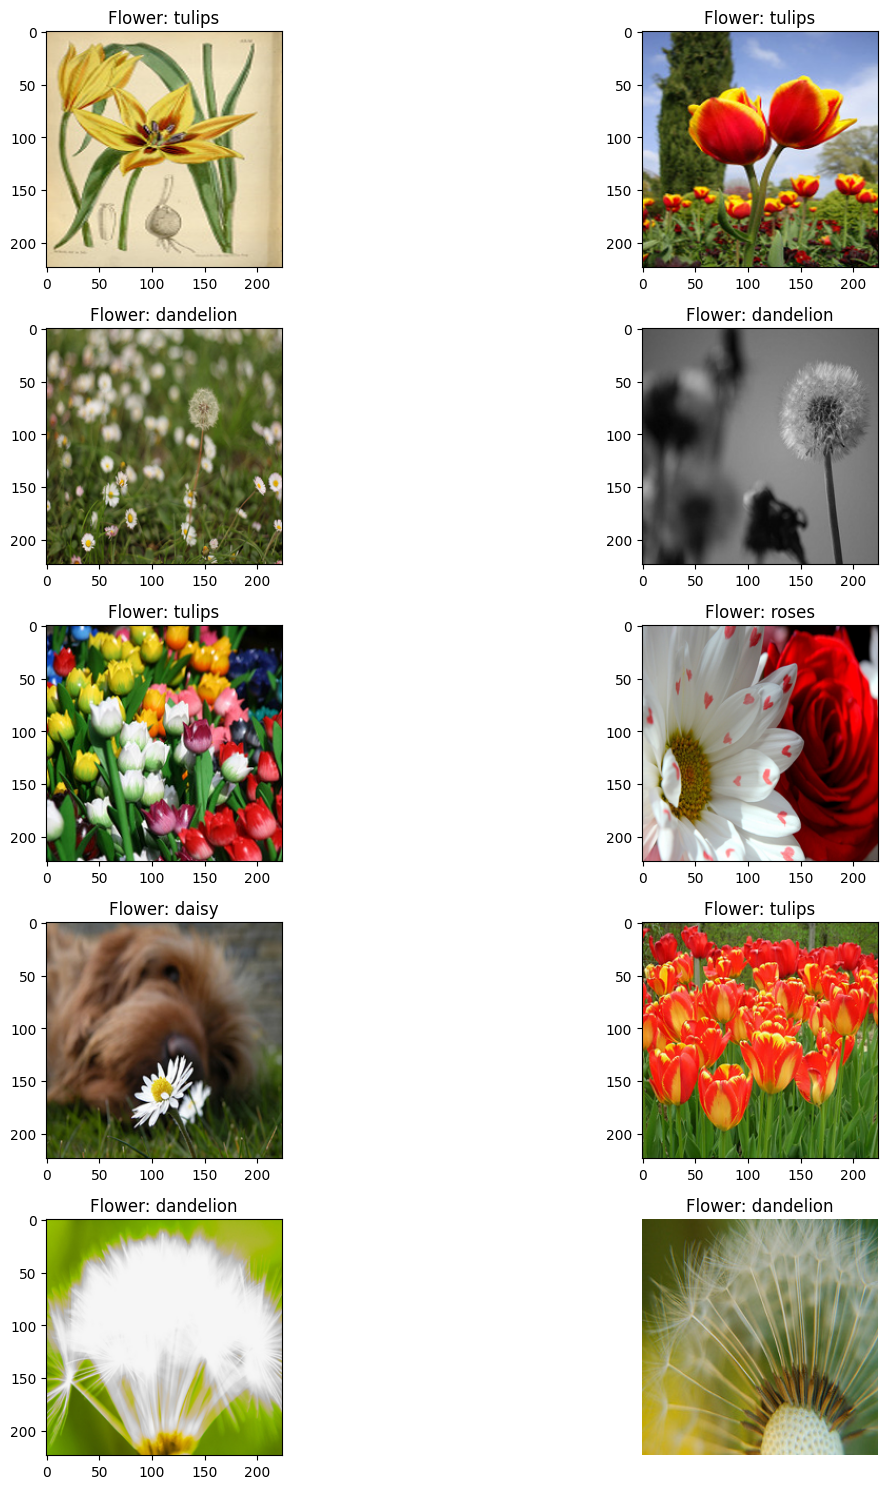

In [ ]:
# random olarak 10 resmi X,y datamızdan çekiyoruz

import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=np.random.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+categories[y[l]])
plt.axis('off')
plt.tight_layout()

In [11]:
# veri boyutunu azaltıp scaler işlemini gerçekleştriyoruz

X = np.array(X).astype('float32')
X = np.array(X) / 255.0
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [13]:
X_train.shape, X_test.shape

((3303, 224, 224, 3), (367, 224, 224, 3))

In [14]:
# Eğitim ve test setlerini yazdırın
print(f"Training set: {len(X_train)} images")
print(f"Test set: {len(X_test)} images")

Training set: 3303 images
Test set: 367 images


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen_train = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,

                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

image_gen_test = ImageDataGenerator()

batch_size = 32

# train datası
X_train_gen = image_gen_train.flow(X_train, y_train, batch_size=batch_size, shuffle=True)

# test datası
X_test_gen = image_gen_test.flow(X_test, y_test, batch_size=batch_size, shuffle=False)

### ÖNEMLİ
Eğer veirimiz train-test split formunda ise X_test_gen kısmında shuffle False olmalı ama dosya path formunda (train_path, test_path) ise shuffle True olmalı

# CNN Modeli

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping

In [65]:
model=Sequential()

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu' ,padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 224, 224, 256)     7168      
                                                                 
 batch_normalization_29 (Ba  (None, 224, 224, 256)     1024      
 tchNormalization)                                               
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 112, 112, 256)     0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 112, 112, 256)     590080    
                                                                 
 batch_normalization_30 (Ba  (None, 112, 112, 256)     1024      
 tchNormalization)                                               
                                                      

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [55]:
model_cnn = model.fit(X_train_gen,
                      epochs=50,
                      validation_data=(X_test_gen),
                      callbacks = [early_stop])

Epoch 1/50
104/104 [==============================] - 99s 896ms/step - loss: 1.5128 - accuracy: 0.4596 - val_loss: 1.7585 - val_accuracy: 0.2807
Epoch 2/50
104/104 [==============================] - 95s 910ms/step - loss: 1.0805 - accuracy: 0.5628 - val_loss: 3.3040 - val_accuracy: 0.2534
Epoch 3/50
104/104 [==============================] - 95s 910ms/step - loss: 1.0265 - accuracy: 0.6091 - val_loss: 2.8479 - val_accuracy: 0.3706
Epoch 4/50
104/104 [==============================] - 95s 907ms/step - loss: 0.9191 - accuracy: 0.6382 - val_loss: 2.1294 - val_accuracy: 0.4060
Epoch 5/50
104/104 [==============================] - 95s 903ms/step - loss: 0.8890 - accuracy: 0.6564 - val_loss: 1.1311 - val_accuracy: 0.6431
Epoch 6/50
104/104 [==============================] - 95s 909ms/step - loss: 0.8309 - accuracy: 0.6757 - val_loss: 0.9269 - val_accuracy: 0.6403
Epoch 7/50
104/104 [==============================] - 95s 909ms/step - loss: 0.7640 - accuracy: 0.7097 - val_loss: 1.3863 - val_ac

In [56]:
manuel_cnn_summary = pd.DataFrame(model.history.history)
manuel_cnn_summary.tail()

,loss,accuracy,val_loss,val_accuracy
17,0.478264,0.819558,0.748115,0.749319
18,0.450227,0.831063,1.172151,0.664850
19,0.452627,0.834998,0.851870,0.702997
20,0.455537,0.831365,1.285558,0.653951
21,0.440346,0.839540,0.799677,0.749319


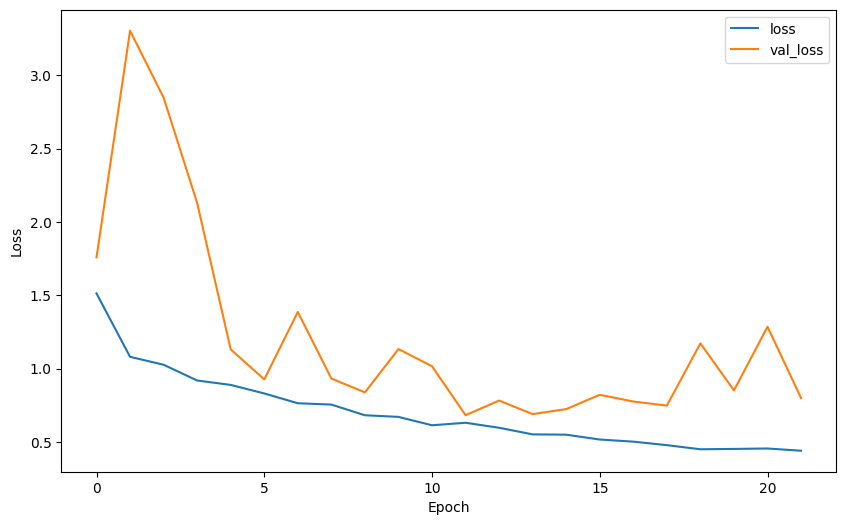

In [57]:
plt.figure(figsize=(10,6))
plt.plot(manuel_cnn_summary.loss, label="loss")
plt.plot(manuel_cnn_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

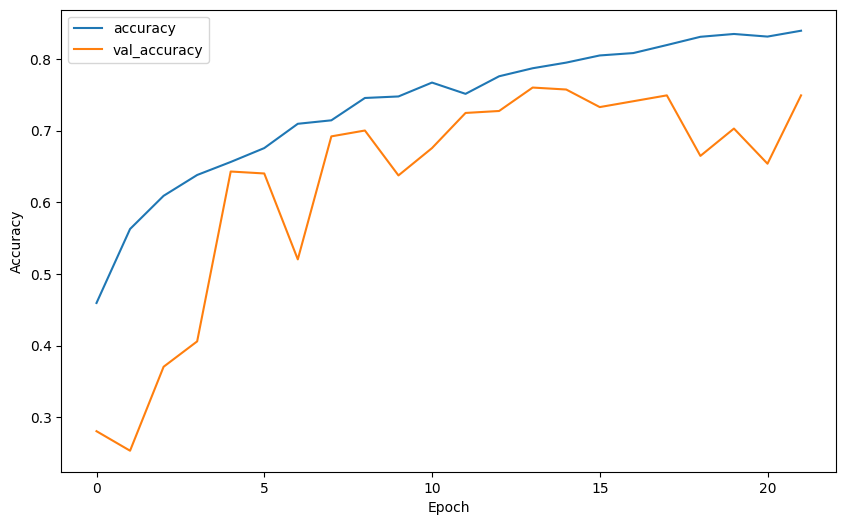

In [58]:
plt.figure(figsize=(10,6))
plt.plot(manuel_cnn_summary.accuracy, label="accuracy")
plt.plot(manuel_cnn_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [59]:
model.metrics_names

['loss', 'accuracy']

In [60]:
model.evaluate(X_test_gen)

12/12 [==============================] - 1s 97ms/step - loss: 0.7997 - accuracy: 0.7493


[0.7996774911880493, 0.7493187785148621]

In [61]:
manuel_cnn_model_pred_probabilities = model.predict(X_test_gen)
manuel_cnn_model_pred_probabilities

12/12 [==============================] - 1s 99ms/step


array([[9.7769278e-01, 4.1221539e-03, 1.0284949e-02, 4.5621819e-05,
        7.8545511e-03],
       [2.0673487e-02, 1.9998536e-02, 1.3669296e-01, 4.9895516e-01,
        3.2367983e-01],
       [4.5750927e-02, 2.6727739e-01, 4.1765883e-04, 5.6232408e-02,
        6.3032168e-01],
       ...,
       [8.9091432e-01, 9.7188286e-02, 1.1214132e-02, 9.9187549e-05,
        5.8399921e-04],
       [7.2611535e-01, 7.6193005e-02, 7.8975046e-03, 3.3047698e-03,
        1.8648931e-01],
       [8.6005670e-01, 8.6946025e-02, 2.7646232e-02, 3.8353240e-03,
        2.1515632e-02]], dtype=float32)

In [62]:
y_test

array([0, 3, 4, 1, 1, 3, 3, 0, 1, 0, 0, 2, 1, 0, 0, 4, 0, 0, 0, 0, 4, 4,
       0, 0, 0, 2, 2, 3, 3, 3, 3, 2, 0, 4, 2, 1, 4, 3, 0, 0, 4, 0, 2, 3,
       1, 1, 4, 1, 3, 2, 2, 0, 0, 4, 2, 3, 3, 2, 4, 0, 2, 2, 3, 0, 2, 3,
       4, 0, 3, 2, 2, 1, 2, 2, 0, 0, 0, 1, 4, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       2, 0, 4, 0, 0, 0, 1, 1, 1, 0, 0, 4, 2, 1, 0, 3, 3, 2, 0, 1, 1, 2,
       1, 0, 0, 4, 3, 2, 2, 2, 4, 4, 0, 4, 2, 4, 1, 1, 2, 0, 1, 0, 3, 3,
       4, 0, 3, 3, 1, 1, 3, 3, 2, 2, 0, 4, 1, 4, 1, 0, 3, 4, 1, 0, 0, 3,
       0, 3, 4, 4, 0, 1, 2, 0, 4, 1, 3, 3, 0, 2, 0, 4, 4, 2, 0, 2, 3, 1,
       4, 0, 1, 0, 3, 1, 3, 2, 4, 2, 0, 3, 0, 1, 4, 0, 1, 3, 0, 4, 0, 4,
       4, 3, 3, 1, 4, 4, 3, 3, 0, 4, 2, 0, 4, 3, 4, 0, 2, 4, 0, 0, 4, 0,
       0, 1, 1, 0, 2, 2, 4, 1, 0, 4, 0, 4, 3, 0, 4, 0, 2, 0, 2, 2, 3, 0,
       4, 2, 1, 4, 2, 1, 0, 4, 0, 4, 3, 2, 2, 4, 2, 3, 4, 1, 2, 0, 3, 2,
       4, 0, 3, 3, 1, 0, 2, 0, 3, 1, 0, 4, 2, 3, 4, 1, 0, 0, 4, 2, 0, 4,
       3, 0, 3, 2, 1, 0, 3, 2, 4, 0, 4, 0, 1, 2, 2,

In [63]:
manuel_cnn_model_probs = np.array(manuel_cnn_model_pred_probabilities)
y_test_pred = np.argmax(manuel_cnn_model_probs, axis=1)
manuel_cnn_model_predictions=y_test_pred
manuel_cnn_model_predictions

array([0, 3, 4, 1, 2, 3, 3, 0, 1, 0, 0, 2, 1, 4, 0, 0, 0, 0, 0, 0, 4, 1,
       1, 0, 0, 2, 0, 4, 3, 1, 3, 2, 1, 1, 2, 1, 4, 3, 0, 0, 4, 0, 2, 2,
       1, 2, 4, 0, 0, 2, 2, 2, 1, 4, 2, 3, 3, 2, 4, 0, 2, 0, 3, 0, 2, 4,
       1, 0, 3, 2, 2, 1, 2, 2, 0, 0, 0, 1, 4, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       2, 0, 4, 0, 0, 0, 1, 1, 1, 0, 0, 3, 2, 1, 0, 3, 1, 2, 0, 1, 0, 2,
       1, 0, 0, 0, 1, 0, 2, 2, 0, 4, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 3, 3,
       4, 0, 0, 3, 1, 1, 3, 0, 2, 2, 0, 4, 1, 4, 1, 0, 3, 3, 1, 0, 3, 4,
       0, 1, 4, 4, 0, 1, 2, 0, 4, 1, 3, 3, 0, 0, 0, 3, 4, 2, 2, 2, 3, 1,
       2, 0, 1, 0, 3, 0, 3, 2, 0, 2, 0, 0, 0, 1, 4, 0, 1, 4, 0, 4, 0, 4,
       4, 2, 3, 1, 4, 4, 1, 4, 0, 3, 0, 0, 3, 0, 4, 0, 2, 4, 0, 2, 4, 0,
       0, 1, 1, 1, 2, 2, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 2, 0, 2, 2, 3, 0,
       4, 2, 1, 4, 2, 1, 0, 4, 0, 4, 3, 2, 0, 4, 2, 3, 4, 1, 1, 0, 3, 2,
       4, 2, 4, 3, 1, 1, 2, 0, 4, 1, 0, 1, 2, 0, 2, 1, 0, 0, 4, 2, 0, 4,
       3, 1, 4, 2, 1, 0, 3, 2, 4, 0, 4, 0, 1, 2, 2,

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, manuel_cnn_model_predictions))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80       103
           1       0.65      0.78      0.71        59
           2       0.80      0.88      0.83        72
           3       0.80      0.53      0.64        62
           4       0.81      0.61      0.69        71

    accuracy                           0.75       367
   macro avg       0.76      0.73      0.73       367
weighted avg       0.76      0.75      0.74       367



In [35]:
confusion_matrix(y_test, manuel_cnn_model_predictions)

array([[59,  2, 13, 14, 15],
       [29,  4,  9,  7, 10],
       [29,  4, 12, 15, 12],
       [33,  3, 10, 10,  6],
       [35,  4,  7,  8, 17]])

In [ ]:
from tensorflow.keras.models import load_model
model.save('flowers_manuel_CNN_model.h5')

# VGG16 İle Transfer Learning

In [67]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [69]:
# VGG16 Modeli cagiralim;
VGG16_model = Sequential()

pretrained_model = tf.keras.applications.VGG16(input_shape=(224,224,3),
                                                include_top=False,
                                                weights = 'imagenet',
                                                pooling='avg')

# VGG16'nin agirliklarini kullansin;
for layer in pretrained_model.layers:
        layer.trainable=False

VGG16_model.add(pretrained_model)

# Flatten Layer (Input)
VGG16_model.add(Flatten())

# ---ANN---

# Fully_connected layer;
VGG16_model.add(Dense(256, activation='relu'))
VGG16_model.add(BatchNormalization())

# Cikis Katmani;
VGG16_model.add(Dense(5, activation='softmax'))

# Modeli compile edelim;
optimizer = Adam(learning_rate=0.001)
VGG16_model.compile(loss= "sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=['accuracy'])


# Model özeti
VGG16_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_35 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 5)                 2565      
                                                      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
VGG16_model = VGG16_model.fit(X_train_gen,
                              epochs=50,
                              validation_data = X_test_gen,
                              callbacks = [early_stop])

In [ ]:
vgg16_summary = pd.DataFrame(model.history.history)
vgg16_summary.tail()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(vgg16_summary.loss, label="loss")
plt.plot(vgg16_summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(vgg16_summary.accuracy, label="accuracy")
plt.plot(vgg16_summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
vgg16_model_pred_probabilities = VGG16_model.predict(X_test_gen)
vgg16_model_pred_probabilities

In [ ]:
vgg16_model_probs = np.array(vgg16_model_pred_probabilities)
y_test_pred = np.argmax(vgg16_model_probs, axis=1)
vgg16_model_predictions=y_test_pred
vgg16_model_predictions

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, vgg16_model_predictions))

In [ ]:
confusion_matrix(y_test, vgg16_model_predictions)

In [ ]:
from tensorflow.keras.models import load_model
VGG16_model.save('flowers_manuel_VGG16_model.h5')